# Rosenbrock Function

$$f(x,y) = (1 - x)^2 + 100(y - x^2)^2$$

With the global minimum value of $0$ at $(1, 1)$ has very large gradients.

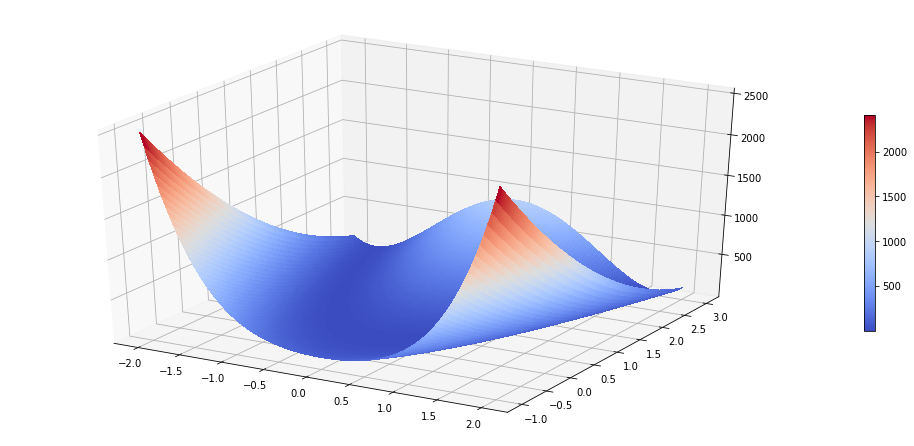

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


def rosenbrock(x, y):
    return np.power((1 - x), 2) + 100 * np.power(y - np.power(x, 2), 2)

X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-1, 3, 100))
Z = rosenbrock(X, Y)
fig = plt.figure(figsize=(14,6))
ax = Axes3D(fig)
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

In [2]:
import metapy as mp
from metapy.algorithms import CatSwarmOptimization


class RosenbrockCSO(CatSwarmOptimization):
    def fitness(self, cat):
        return rosenbrock(cat[0], cat[1])
    
    def move(self, cat, best_cat, current_velocity, velocity_factor, max_velocity):
        return mp.moving.move_continuous(cat, best_cat, current_velocity, velocity_factor, max_velocity)
    
    def alter_position(self, cat, seeking_range_per_dimension, count_of_dimenstions_to_change):
        return mp.moving.alter_position_continuous(cat, seeking_range_per_dimension, count_of_dimenstions_to_change)
    
    def init_population(self):
        return [np.random.uniform(-5.12, 5.12, 2)] * self.population_size
        
    def init_velocities(self):
        return [np.random.uniform(-0.5, 0.5)] * self.population_size
    

cso = RosenbrockCSO(mixture_ratio=0.2,
                    seeking_memory_pool=20,
                    seeking_range_per_dimension=[1, 1],
                    count_of_dimensions_to_change=1,
                    self_position_consideration=True,
                    velocity_factor=2,
                    max_velocity=np.array([0.2, 0.2]),
                    fitmax=1e5,
                    fitmin=0,
                    minimize=True)

res = cso.optimize(max_time=20)

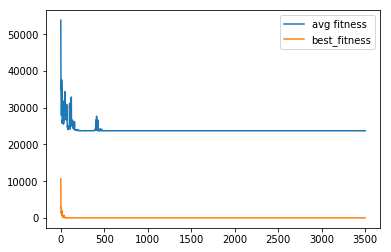

[-2.25139111e-28 -4.31552211e-30] 1.0


In [3]:
plt.plot(np.arange(0, len(res.averaged_progress)), res.averaged_progress, label="avg fitness")
plt.plot(np.arange(0, len(res.best_progress)), res.best_progress, label="best_fitness")
plt.legend()
plt.show()
print(res.solution, rosenbrock(*res.solution))